In [2]:
# %% load Libraries
import pandas as pd
import numpy as np
# visualization

import matplotlib.pyplot as plt

#models
from modules.LassoRegressionClass import *
from modules.NaiveElasticRegressionClass import *
from modules.ElasticNetRegressionClass import *

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
#pipelines and preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline 



In [3]:
# %% Load Data
df_prosate = pd.read_csv('homeworks/data/boston.csv')


In [4]:
#% Select data for the model
X = df_prosate.iloc[:, :-1]
y = df_prosate.iloc[:, -1]

# %% Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 12), (152, 12), (354,), (152,))

In [6]:

lambda_l1_penality = 1

lambda_l2_penality = 0.8 

# parameters to the optimization

max_iterations=10000

threshold=1e-7

In [7]:
## Experiments with the prostate dataset

# 1. Fitting OLS, Lasso,Ridge Naive Elastic Net and Elastic Net with the prostate dataset

# 1.1 Fitting OLS
steps_ols = [
    ('scaler', StandardScaler()),  # Normaliza los datos como primer paso
    ('linear_reg', LinearRegression())  # Aplica la regresión lineal como segundo paso
]

OLS_pipeline = Pipeline(steps_ols)

OLS_pipeline.fit(X_train, y_train)

OLS_predict = OLS_pipeline.predict(X_test)

print('MSE OLS:',mean_squared_error(OLS_predict,y_test))

print('Coeficientes OLS:',OLS_pipeline.named_steps['linear_reg'].coef_)


# 1.2 Fitting Lasso

steps_lasso = [
    ('scaler', StandardScaler()),  # Normaliza los datos como primer paso
    ('lasso_reg', Lasso(alpha=lambda_l1_penality))  # Aplica la regresión Lasso con el parámetro alpha aleatorio
]

# Define el pipeline
lasso_pipeline = Pipeline(steps_lasso)

lasso_pipeline.fit(X_train, y_train)

lasso_predict = lasso_pipeline.predict(X_test)

print('MSE Lasso:',mean_squared_error(lasso_predict,y_test))
print('Coeficientes Lasso:',lasso_pipeline.named_steps['lasso_reg'].coef_)


# 1.3 Fitting Ridge

steps_ridge = [
    ('scaler', StandardScaler()),  # Normaliza los datos como primer paso
    ('ridge_reg', Ridge(alpha=lambda_l2_penality))  # Aplica la regresión Ridge como segundo paso
]

ridge_pipeline = Pipeline(steps_ridge)

ridge_pipeline.fit(X_train, y_train)

ridge_predict = ridge_pipeline.predict(X_test)

print('MSE Ridge:',mean_squared_error(ridge_predict,y_test))
print('Coeficientes Ridge:',ridge_pipeline.named_steps['ridge_reg'].coef_)



MSE OLS: 21.115450613869562
Coeficientes OLS: [-1.16096196  0.81544469  0.25150446  0.90388642 -1.86406727  2.8008198
 -0.24506311 -2.94795852  1.89664169 -1.52987704 -2.00684723 -4.07422149]
MSE Lasso: 26.845998033124275
Coeficientes Lasso: [-0.0428574   0.         -0.          0.23722447 -0.          2.69587092
 -0.         -0.         -0.         -0.         -1.2605468  -3.83887414]
MSE Ridge: 21.150634602300627
Coeficientes Ridge: [-1.15116189  0.79899751  0.22921446  0.90788815 -1.83477688  2.80687668
 -0.24809408 -2.91545323  1.83336392 -1.47404089 -1.99840526 -4.06084384]


In [8]:
# 1.4 Fitting Naive Elastic Net


naive_elastic_reg = NaiveElasticRegression(lambda_l1_penality,lambda_l2_penality,max_iterations=max_iterations,threshold=threshold)
## Testing Implementation Naive Elastics Regression
# Make a pipeline

my_naive_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('naive_elasticnet', naive_elastic_reg),
])

# fitting the model
my_naive_pipeline.fit(X_train, y_train)

scaler = StandardScaler()

# Ajusta y transforma los datos de entrenamiento
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))

# Transforma los datos de prueba
y_test_scaled = scaler.transform(y_test.values.reshape(-1,1))

y_predict_naive = my_naive_pipeline.predict(X_test)

print('MSE Naive Elastic:',mean_squared_error(y_predict_naive,y_test_scaled))
print('Coeficientes with Naive:',my_naive_pipeline.named_steps['naive_elasticnet'].coef_)


# 1.5 Fitting Elastic Net

model_elasticnet = ElasticNetRegression(lambda_l1_penality,lambda_l2_penality,max_iterations=max_iterations, threshold=threshold)

my_elasticnet_pipeline = Pipeline(
    [
        ('std_scaled',StandardScaler()),
        ('model_elasticnet',model_elasticnet)   
    ])

my_elasticnet_pipeline.fit(X_train,y_train)

y_predict_elasticnet = my_elasticnet_pipeline.predict(X_test)
print('MSE ElasticNet:',mean_squared_error(y_predict_elasticnet,y_test_scaled))
print('Coefficients elasticnet',my_elasticnet_pipeline.named_steps['model_elasticnet'].coef_)

MSE Naive Elastic: 30.85850093928342
Coeficientes with Naive: [-0.11679819  0.          0.          0.22114865  0.          2.82965261
  0.          0.          0.          0.         -1.25016112 -3.60769337]
MSE ElasticNet: 111.81454421827756
Coefficients elasticnet [-0.21023674  0.          0.          0.39806757  0.          5.0933747
  0.          0.          0.          0.         -2.25029001 -6.49384807]


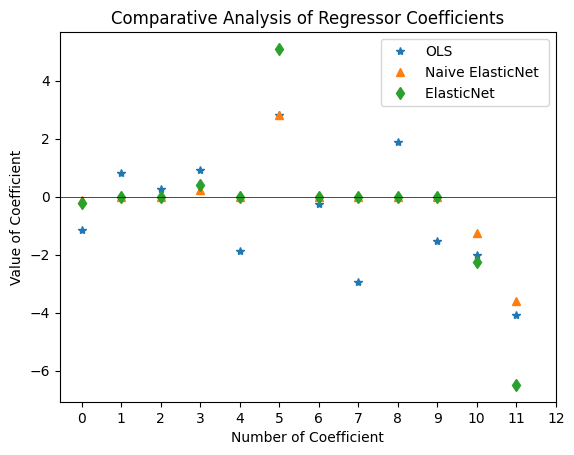

In [10]:

## Visualization of Coefficients



plt.plot(OLS_pipeline.named_steps['linear_reg'].coef_, '*', label='OLS')
plt.plot(lasso_pipeline.named_steps['lasso_reg'].coef_, '+', label='Lasso')
plt.plot(ridge_pipeline.named_steps['ridge_reg'].coef_, 'x', label='Ridge')
plt.plot(my_naive_pipeline.named_steps['naive_elasticnet'].coef_,'^',label='Naive ElasticNet ')
plt.plot(my_elasticnet_pipeline.named_steps['model_elasticnet'].coef_,'d',label='ElasticNet ')

plt.title("Comparative Analysis of Regressor Coefficients")
plt.xlabel('Number of Coefficient')
plt.ylabel('Value of Coefficient')
plt.xticks(range(0, 13))  # Cambia los ticks del eje x para que vayan de 1 a 13
plt.axhline(0, color='black', linewidth=0.5)  # Dibuja una línea horizontal en el valor 0
plt.legend()
plt.savefig('house_models_regression.png')
plt.show()